In [2]:
import torch
import torch.nn as nn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


# This relates to plotting datetime values with matplotlib:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

matplotlib can properly handle datetime values when plotting. 

In [3]:
df=pd.read_csv("Data/Alcohol_Sales.csv",index_col=0,parse_dates=True)
df.head(5)


,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [4]:
len(df)

325

In [5]:
df.dropna(inplace=True)

In [6]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [7]:
df.tail()

,S4248SM144NCEN
DATE,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


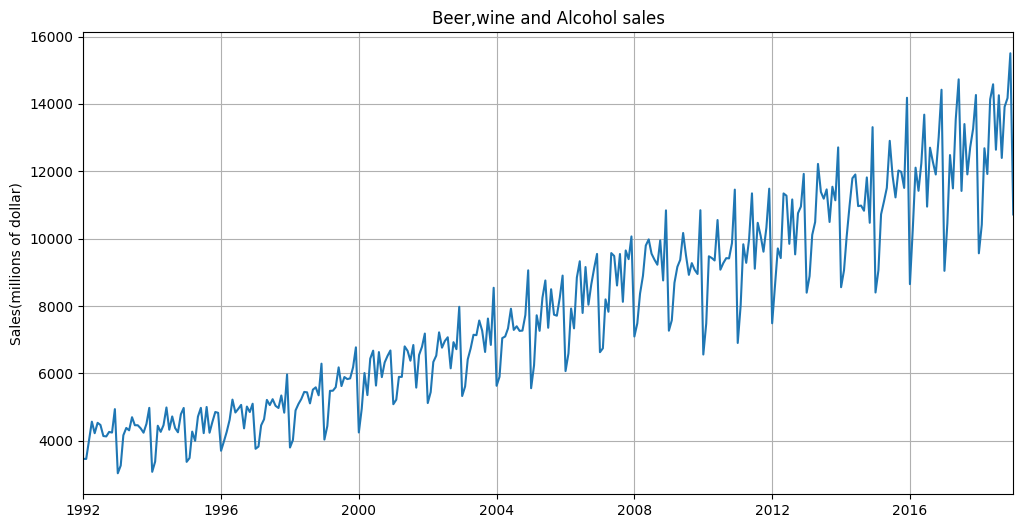

In [8]:
#plot the series 
plt.figure(figsize=(12,6))
plt.ylabel("Sales(millions of dollar)")
plt.title("Beer,wine and Alcohol sales")
plt.grid(True)
plt.autoscale(axis="x",tight=True)
plt.plot(df["S4248SM144NCEN"])
plt.show()

Data preparartion
In the next steps we'll divide the data into train/test sets, then normalize the training values so that they fall between -1 and 1 (to improve training). We'll train the model, then predict into a period that matches the test set. Finally, we'll forecast into an unknown future.

In [9]:
df

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


In [10]:
#Extract value fro the csv file 

y=df["S4248SM144NCEN"].values.astype(float)
y

array([ 3459.,  3458.,  4002.,  4564.,  4221.,  4529.,  4466.,  4137.,
        4126.,  4259.,  4240.,  4936.,  3031.,  3261.,  4160.,  4377.,
        4307.,  4696.,  4458.,  4457.,  4364.,  4236.,  4500.,  4974.,
        3075.,  3377.,  4443.,  4261.,  4460.,  4985.,  4324.,  4719.,
        4374.,  4248.,  4784.,  4971.,  3370.,  3484.,  4269.,  3994.,
        4715.,  4974.,  4223.,  5000.,  4235.,  4554.,  4851.,  4826.,
        3699.,  3983.,  4262.,  4619.,  5219.,  4836.,  4941.,  5062.,
        4365.,  5012.,  4850.,  5097.,  3758.,  3825.,  4454.,  4635.,
        5210.,  5057.,  5231.,  5034.,  4970.,  5342.,  4831.,  5965.,
        3796.,  4019.,  4898.,  5090.,  5237.,  5447.,  5435.,  5107.,
        5515.,  5583.,  5346.,  6286.,  4032.,  4435.,  5479.,  5483.,
        5587.,  6176.,  5621.,  5889.,  5828.,  5849.,  6180.,  6771.,
        4243.,  4952.,  6008.,  5353.,  6435.,  6673.,  5636.,  6630.,
        5887.,  6322.,  6520.,  6678.,  5082.,  5216.,  5893.,  5894.,
      

In [11]:
test_size=12

In [12]:
train_set=y[:-test_size]
test_set=y[-test_size:]

In [13]:
train_set

array([ 3459.,  3458.,  4002.,  4564.,  4221.,  4529.,  4466.,  4137.,
        4126.,  4259.,  4240.,  4936.,  3031.,  3261.,  4160.,  4377.,
        4307.,  4696.,  4458.,  4457.,  4364.,  4236.,  4500.,  4974.,
        3075.,  3377.,  4443.,  4261.,  4460.,  4985.,  4324.,  4719.,
        4374.,  4248.,  4784.,  4971.,  3370.,  3484.,  4269.,  3994.,
        4715.,  4974.,  4223.,  5000.,  4235.,  4554.,  4851.,  4826.,
        3699.,  3983.,  4262.,  4619.,  5219.,  4836.,  4941.,  5062.,
        4365.,  5012.,  4850.,  5097.,  3758.,  3825.,  4454.,  4635.,
        5210.,  5057.,  5231.,  5034.,  4970.,  5342.,  4831.,  5965.,
        3796.,  4019.,  4898.,  5090.,  5237.,  5447.,  5435.,  5107.,
        5515.,  5583.,  5346.,  6286.,  4032.,  4435.,  5479.,  5483.,
        5587.,  6176.,  5621.,  5889.,  5828.,  5849.,  6180.,  6771.,
        4243.,  4952.,  6008.,  5353.,  6435.,  6673.,  5636.,  6630.,
        5887.,  6322.,  6520.,  6678.,  5082.,  5216.,  5893.,  5894.,
      

In [14]:
len(train_set)

313

In [15]:
len(test_set)

12

It's worth noting that in our previous exercise the train and test sets were tensors. Here they're numpy arrays. This is because one of the steps we're about to perform outputs an array, and we'd have to turn it into a tensor anyway.

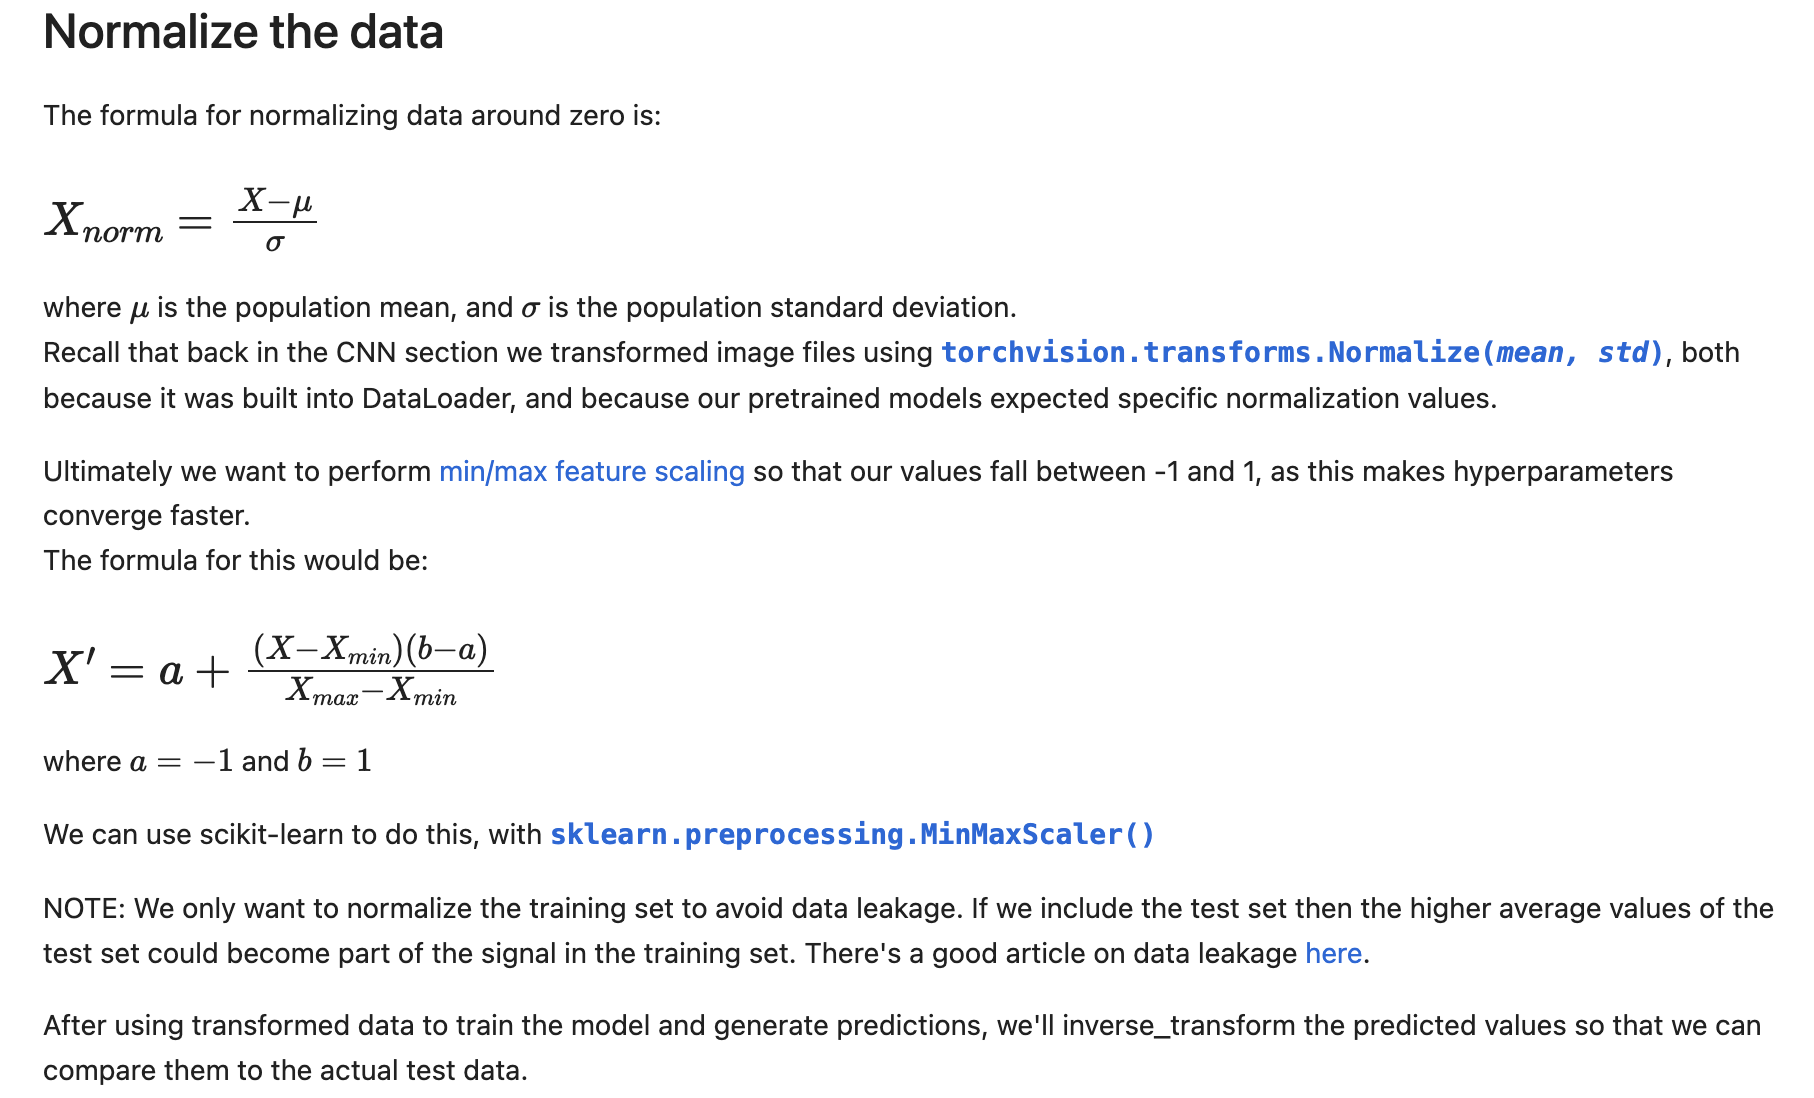

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate a scaler with a feature range from -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))

In [17]:
# Normalize the training set
train_norm = scaler.fit_transform(train_set.reshape(-1, 1))

In [18]:
train_set[:10]

array([3459., 3458., 4002., 4564., 4221., 4529., 4466., 4137., 4126.,
       4259.])

In [19]:
train_norm[:20]

array([[-0.92683135],
       [-0.92700231],
       [-0.83400291],
       [-0.73792632],
       [-0.79656381],
       [-0.74390974],
       [-0.75467989],
       [-0.81092401],
       [-0.81280451],
       [-0.79006753],
       [-0.79331567],
       [-0.67433114],
       [-1.        ],
       [-0.9606804 ],
       [-0.80699205],
       [-0.76989486],
       [-0.7818617 ],
       [-0.71536029],
       [-0.75604753],
       [-0.75621848]])

Data preparation for LSTM training
Here we'll create our list of (seq/label) tuples from the training set. Recall that an LSTM consumes a window of samples toward the first prediction, so the size of our training set will become ((325 - test_size) - window_size).

LSTMs are a type of Recurrent Neural Network (RNN) that are used for sequence prediction problems. They work by taking in a "window" of past data to predict the next value in the sequence. This code prepares the training data to feed into an LSTM network.

In [20]:
train_norm=torch.FloatTensor(train_norm).view(-1)
window_size=12

In [21]:
L=len(train_norm)
L

313

In [22]:
#define a function to  create sequence/label

def input_data(seq,ws):
    out=[]
    L=len(seq)
    for i in range(L-ws):
        window=seq[i:i+ws]
        label=seq[i+ws:i+ws+1]
        out.append((window,label))
    return out
        

In [23]:
#apply the input_data function to train_norm 

train_data=input_data(train_norm,window_size)

In [24]:
train_data

[(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
          -0.8128, -0.7901, -0.7933, -0.6743]),
  tensor([-1.])),
 (tensor([-0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128,
          -0.7901, -0.7933, -0.6743, -1.0000]),
  tensor([-0.9607])),
 (tensor([-0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128, -0.7901,
          -0.7933, -0.6743, -1.0000, -0.9607]),
  tensor([-0.8070])),
 (tensor([-0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128, -0.7901, -0.7933,
          -0.6743, -1.0000, -0.9607, -0.8070]),
  tensor([-0.7699])),
 (tensor([-0.7966, -0.7439, -0.7547, -0.8109, -0.8128, -0.7901, -0.7933, -0.6743,
          -1.0000, -0.9607, -0.8070, -0.7699]),
  tensor([-0.7819])),
 (tensor([-0.7439, -0.7547, -0.8109, -0.8128, -0.7901, -0.7933, -0.6743, -1.0000,
          -0.9607, -0.8070, -0.7699, -0.7819]),
  tensor([-0.7154])),
 (tensor([-0.7547, -0.8109, -0.8128, -0.7901, -0.7933, -0.6743, -1.0000, -0.9607,
          

In [25]:
len(train_data)

301

In [28]:
#define the model LSTM

class SalesPredictor(nn.Module):

    def __init__(self,input_size=1,hidden_size=100,output_size=1):
        super().__init__()
        self.hidden_size=hidden_size
        self.lstm=nn.LSTM(input_size,hidden_size)
        self.linear=nn.Linear(hidden_size,output_size)
        self.hidden=(torch.zeros(1,1,self.hidden_size),
                     torch.zeros(1,1,self.hidden_size))
        
    def forward(self,seq):
        out,self.hidden=self.lstm(seq.view(len(seq),1,-1),self.hidden)
        pred=self.linear(out.view(len(seq),-1))
        return pred[-1]



In [29]:
predictorModel=SalesPredictor()
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(predictorModel.parameters(),lr=0.001)

predictorModel


SalesPredictor(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [30]:
epochs=10

import time 
start_time =time.time()

for epoch in range(epochs):
    for seq, y_train in train_data:

        optimizer.zero_grad()

        predictorModel.hidden=(torch.zeros(1,1,predictorModel.hidden_size),
                               torch.zeros(1,1,predictorModel.hidden_size))
        y_pred=predictorModel(seq)

        loss=criterion(y_pred,y_train)
        loss.backward()
        optimizer.step()

    print(f'epoch: {epoch+1:2} Loss:{loss.item():10.8f}')

print(f'\nDuration:{time.time()-start_time:.0f}seconds')


epoch:  1 Loss:0.36579335
epoch:  2 Loss:0.29601067
epoch:  3 Loss:0.39226002
epoch:  4 Loss:0.34200764
epoch:  5 Loss:0.32204482
epoch:  6 Loss:0.32551473
epoch:  7 Loss:0.32227427
epoch:  8 Loss:0.30940807
epoch:  9 Loss:0.32432851
epoch: 10 Loss:0.29291400

Duration:3seconds


Model's inference 

In [31]:
future=12

preds=train_norm[-window_size:].tolist()

predictorModel.eval()

for i in range(future):
    seq=torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        predictorModel.hidden=(torch.zeros(1,1,predictorModel.hidden_size),
                               torch.zeros(1,1,predictorModel.hidden_size))
        preds.append(predictorModel(seq).item())
        

In [33]:
preds[window_size:]

[0.7098281383514404,
 0.7670696377754211,
 0.7762676477432251,
 0.8003631830215454,
 0.7938315272331238,
 0.7589441537857056,
 0.7808883190155029,
 0.7693279385566711,
 0.7838229537010193,
 0.7868024110794067,
 0.7805277109146118,
 0.7520720958709717]


Let's invert the prediction so that we can compare them with original values in test sets.

Note that inverse_transform uses the most recently applied parameters; we can rescale based on the test data, but not on the previous training data.

In [37]:
true_prediction=scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1,1))
true_prediction=true_prediction.squeeze()

In [42]:
true_prediction

array([13032.63969529, 13367.47384617, 13421.27760547, 13562.22443908,
       13524.01751855, 13319.94382757, 13448.30622208, 13380.68377659,
       13465.47236767, 13482.90070361, 13446.196845  , 13279.7457248 ])

In [38]:
df["S4248SM144NCEN"][-12:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

Plot the results
Our original data contains a datetime index, but our predicted values do not. We can create a range of dates using NumPy that are spaced one month apart using dtype='datetime64[M]', and then store them with day values to match our dataset with .astype('datetime64[D]').

In [39]:
x=np.arange('2018-02-01','2019-02-01',dtype='datetime64[M]').astype('datetime64[D]')
x

array(['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
       '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
       '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='datetime64[D]')

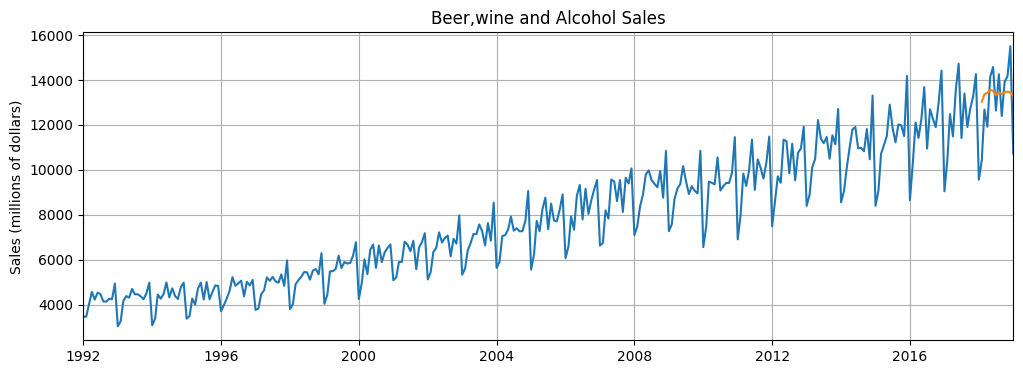

In [40]:
plt.figure(figsize=(12,4))
plt.title('Beer,wine and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_prediction)
plt.show()


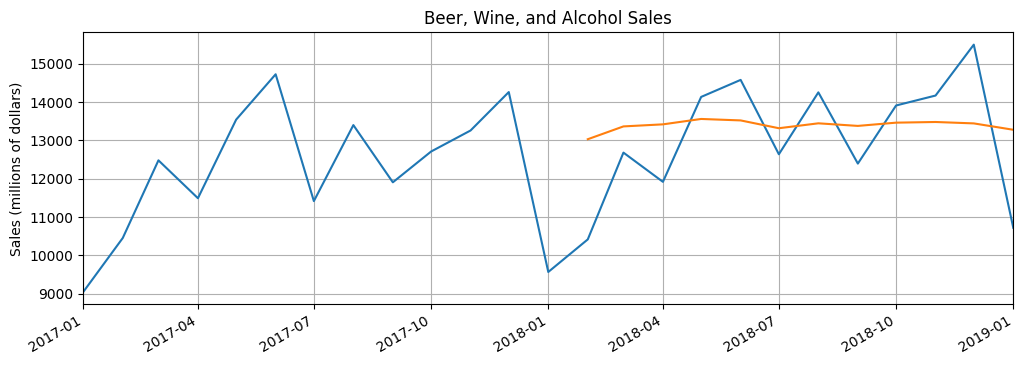

In [41]:

# Plot the end of the graph
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()

# Select the end of the graph with slice notation:
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_prediction)
plt.show()

In [43]:
train_norm

tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
        -0.8128, -0.7901, -0.7933, -0.6743, -1.0000, -0.9607, -0.8070, -0.7699,
        -0.7819, -0.7154, -0.7560, -0.7562, -0.7721, -0.7940, -0.7489, -0.6678,
        -0.9925, -0.9408, -0.7586, -0.7897, -0.7557, -0.6660, -0.7790, -0.7114,
        -0.7704, -0.7919, -0.7003, -0.6683, -0.9420, -0.9226, -0.7884, -0.8354,
        -0.7121, -0.6678, -0.7962, -0.6634, -0.7942, -0.7396, -0.6889, -0.6931,
        -0.8858, -0.8373, -0.7896, -0.7285, -0.6260, -0.6914, -0.6735, -0.6528,
        -0.7719, -0.6613, -0.6890, -0.6468, -0.8757, -0.8643, -0.7567, -0.7258,
        -0.6275, -0.6536, -0.6239, -0.6576, -0.6685, -0.6049, -0.6923, -0.4984,
        -0.8692, -0.8311, -0.6808, -0.6480, -0.6229, -0.5870, -0.5890, -0.6451,
        -0.5753, -0.5637, -0.6042, -0.4435, -0.8289, -0.7600, -0.5815, -0.5808,
        -0.5630, -0.4623, -0.5572, -0.5114, -0.5218, -0.5182, -0.4617, -0.3606,
        -0.7928, -0.6716, -0.4911, -0.60